In [2]:
import numpy as np
import pandas as pd

In [ ]:
#Step 1:
life = pd.read_excel('Spiced_Projects/gapminder_lifeexpectancy.xlsx', index_col=0)
fert = pd.read_csv('gapminder_total_fertility.csv', index_col=0)
popu = pd.read_excel('gapminder_population.xlsx', index_col = 0)

In [21]:
life.head()

,1850,1950,2000,2015
Life expectancy,,,,
Abkhazia,NaN,NaN,NaN,NaN
Afghanistan,27.7,26.85,50.1,53.8
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN
Albania,35.4,54.48,74.7,78.0
Algeria,15.0,42.77,73.3,76.4


In [13]:
life.isna().sum()

1800    59
1801    59
1802    59
1803    59
1804    59
        ..
2012    52
2013    52
2014    52
2015    52
2016    52
Length: 217, dtype: int64

In [15]:
life = life[[1850, 1950, 2000, 2015]]

In [16]:
import matplotlib.pyplot as plt

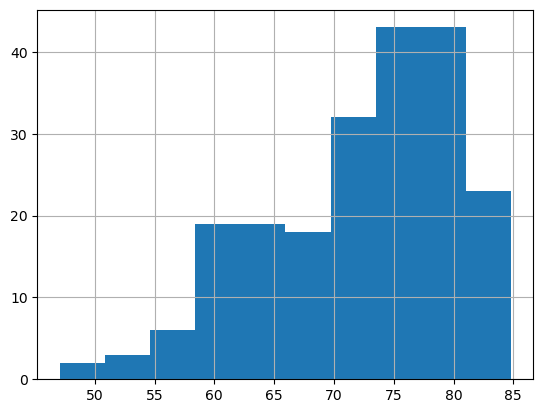

In [20]:
life[2015].hist()
plt.savefig('histo.png')

<Axes: >

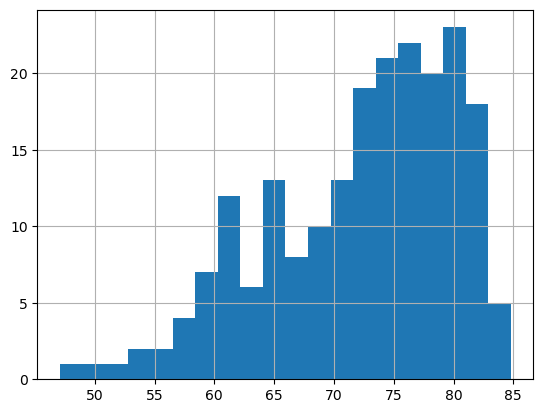

In [28]:
#life[2015].hist(bins=5)
#life[2015].hist(bins=10)
life[2015].hist(bins=20)

Text(0, 0.5, 'y')

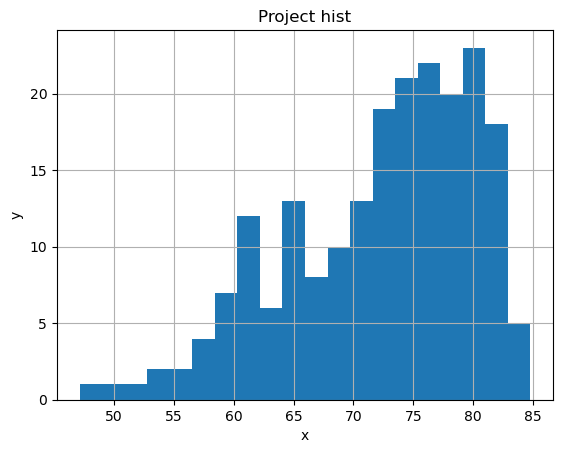

In [30]:
life[2015].hist(bins=20)
plt.title('Project hist')
plt.xlabel('x')
plt.ylabel('y')